### preprocessing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib #
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn #
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay,confusion_matrix
from sklearn.model_selection import KFold
import mlflow
import mlflow.sklearn
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}".format(sns.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))
print("MLFlow: {}".format(mlflow.__version__))

Numpy: 1.23.5
Pandas: 1.5.3
matplotlib: 3.7.0
seaborn: 0.12.2
Scikit-Learn: 1.2.1
MLFlow: 2.7.1


In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

no missing values

C:\Users\Salma\AppData\Local\Temp\ipykernel_10416\2599135167.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


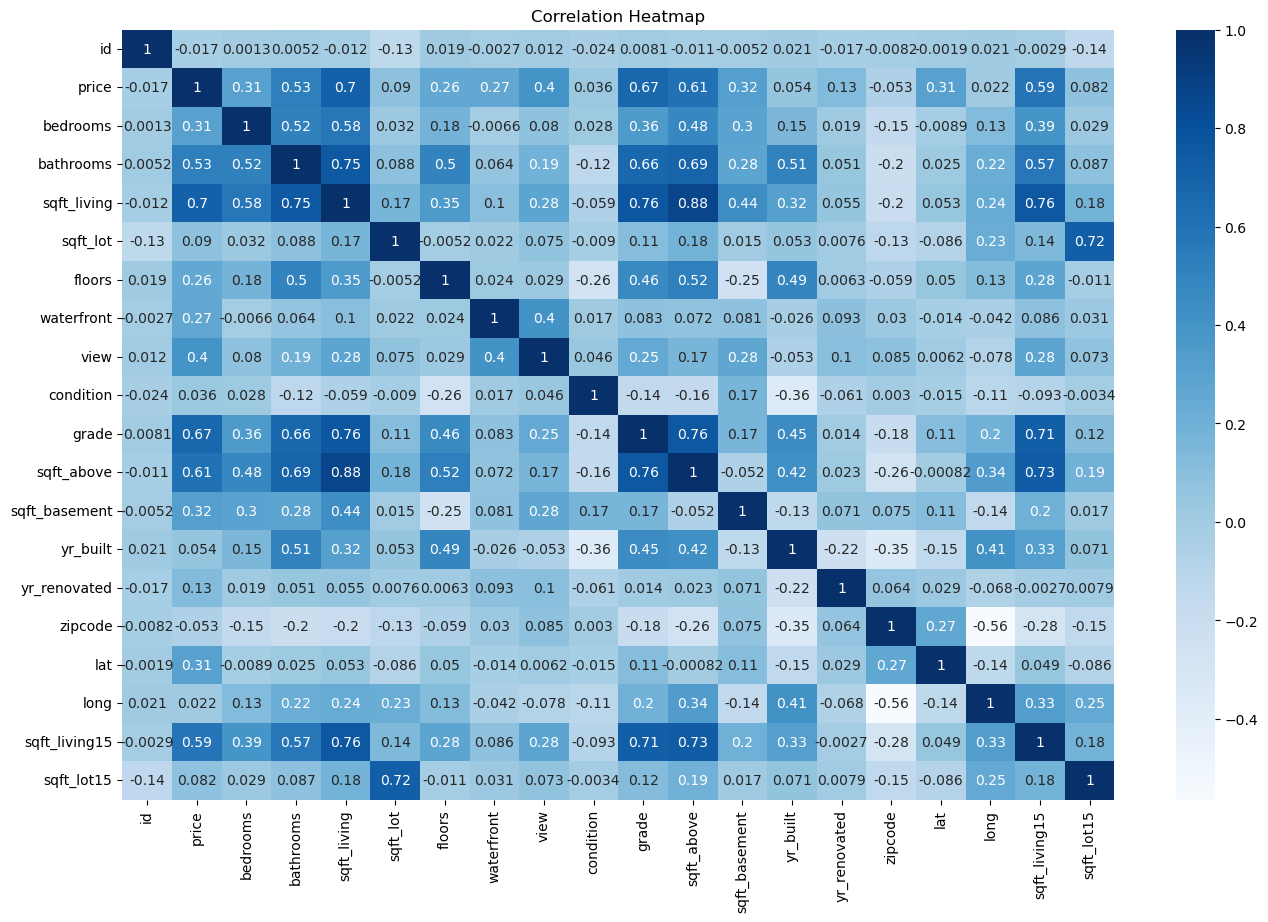

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
df.drop(columns=['id', 'date', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15'], inplace=True)
# as they show low correlation with the target variable

In [14]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1955,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1951,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,1933,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1965,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1987,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,2009,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,2014,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,2009,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,2004,0,47.5345,1410


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1) 
y = df['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
def evaluate(sk_model, x_test, y_test):
    preds = sk_model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"R-squared: {r2:.3f}")
    print(f"Mean Absolute Error: {mae:.3f}")


In [11]:

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
mlflow.set_experiment("scikit_learn_experiment_linear")

with mlflow.start_run():
    linear_model = linear_model.fit(X_train, y_train)
    mlflow.log_params({"fit_intercept": linear_model.fit_intercept})
    train_mse_linear = mean_squared_error(y_train, linear_model.predict(X_train))
    mlflow.log_metric("train_mse", train_mse_linear)
    print(f"Linear Regression Train MSE: {train_mse_linear:.3f}")
    test_mse_linear = mean_squared_error(y_test, linear_model.predict(X_test))
    mlflow.log_metric("test_mse", test_mse_linear)
    print(f"Linear Regression Test MSE: {test_mse_linear:.3f}")
    mlflow.sklearn.log_model(linear_model, "linear_reg_model")
    print("Linear Regression Model run: ", mlflow.active_run().info.run_uuid)

mlflow.end_run()


Linear Regression Train MSE: 40232182796.437
Linear Regression Test MSE: 44947196034.465
Linear Regression Model run:  1deab5ae8fd94fc3911f44bd2588ec82


C:\Users\Salma\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [12]:
import mlflow
from sklearn.svm import SVR

svr_model = SVR()
mlflow.set_experiment("scikit_learn_experiment_svm")

with mlflow.start_run():
    params_svm = {
        "C": 1.0,
        "kernel": 'rbf', 
        "epsilon": 0.1 
    }
    mlflow.log_params(params_svm)

    svr_model = svr_model.fit(X_train, y_train)
    train_mse_svm = mean_squared_error(y_train, svr_model.predict(X_train))
    test_mse_svm = mean_squared_error(y_test, svr_model.predict(X_test))
    
    mlflow.log_metric("train_mse", train_mse_svm)
    mlflow.log_metric("test_mse", test_mse_svm)
    
    print(f"SVM Train MSE: {train_mse_svm:.3f}")
    print(f"SVM Test MSE: {test_mse_svm:.3f}")
    
    mlflow.sklearn.log_model(svr_model, "svm_reg_model")
    print("SVM Model run: ", mlflow.active_run().info.run_uuid)

mlflow.end_run()


SVM Train MSE: 138015975578.065
SVM Test MSE: 153230221298.137
SVM Model run:  3a460e8e8fbc4204a07a25f4ad1d23b6


In [13]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=None)
mlflow.set_experiment("scikit_learn_experiment")

with mlflow.start_run():
    params = {
        "max_depth": 5,
        "min_samples_split": 2,
        "min_samples_leaf": 1
    }
    
    mlflow.log_params(params)
    dt_model = dt_model.fit(X_train, y_train)
    train_mse = mean_squared_error(y_train, dt_model.predict(X_train))
    test_mse = mean_squared_error(y_test, dt_model.predict(X_test))
    mlflow.log_metric("train_mse", train_mse)
    mlflow.log_metric("test_mse", test_mse)
    print(f"Train MSE: {train_mse:.3f}")
    print(f"Test MSE: {test_mse:.3f}")
    mlflow.sklearn.log_model(dt_model, "decision_tree_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()


Train MSE: 84617065.717
Test MSE: 48468269904.616
Model run:  fe762cd006d34257aa37a869eecc891f


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=None)
mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
    params = {
        "n_estimators": 100,
        "max_depth": 10,
        "min_samples_split": 2,
        "min_samples_leaf": 1
    }
    mlflow.log_params(params)
    rf_model = rf_model.fit(X_train, y_train)
    train_mse = mean_squared_error(y_train, rf_model.predict(X_train))
    test_mse = mean_squared_error(y_test, rf_model.predict(X_test))
    mlflow.log_metric("train_mse", train_mse)
    mlflow.log_metric("test_mse", test_mse)
    print(f"Train MSE: {train_mse:.3f}")
    print(f"Test MSE: {test_mse:.3f}")
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()


Train MSE: 3043424317.963
Test MSE: 28460657653.143
Model run:  622c2830f2a849c7a4229441db1ccb82


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import mlflow
import mlflow.sklearn
gb_model = GradientBoostingRegressor(random_state=None)
mlflow.set_experiment("scikit_learn_experiment")

with mlflow.start_run():
    params = {
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3,
        "min_samples_split": 2,
        "min_samples_leaf": 1
    }
    mlflow.log_params(params)
    gb_model = gb_model.fit(X_train, y_train)
    train_mse = mean_squared_error(y_train, gb_model.predict(X_train))
    test_mse = mean_squared_error(y_test, gb_model.predict(X_test))
    mlflow.log_metric("train_mse", train_mse)
    mlflow.log_metric("test_mse", test_mse)
    print(f"Train MSE: {train_mse:.3f}")
    print(f"Test MSE: {test_mse:.3f}")
    mlflow.sklearn.log_model(gb_model, "gradient_boosting_model")
    
    print("Model run: ", mlflow.active_run().info.run_uuid)

mlflow.end_run()


Train MSE: 16837891740.172
Test MSE: 28090541784.741
Model run:  365b0512e5d1413e89420f70f2702ebc


Based on MSE random forest perform the best

In [30]:
import pickle
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Save the preprocessing transformations using pickle
with open("preprocessing_transformations.pkl", "wb") as file:
    pickle.dump(scaler, file)

initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(rf_model, initial_types=initial_type)

onnx.save_model(onnx_model, "random_forest_model.onnx")

